# TP 6 Réseaux de neurones - Multi classification et Propagation en arrière
Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [202]:
# données
data = np.genfromtxt('data_2.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [217]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [204]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

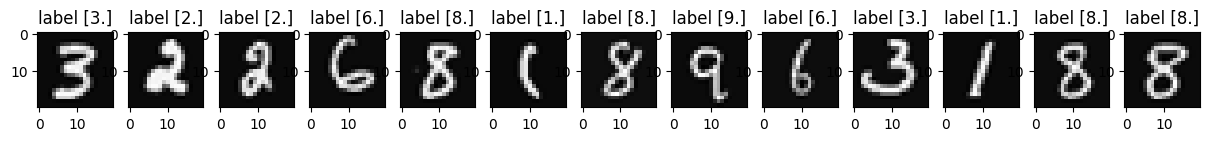

In [205]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [218]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [219]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [220]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [221]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [222]:
input_layer_size  = 400
hidden_layer_size = 25   
num_labels = 10

# Calcul du coût

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [252]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))
def SigmoidGrad(z):
    """
    Computes the gradient of the sigmoid function of the input.
    """
    return Sigmoid(z) * (1 - Sigmoid(z))

In [253]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.dot(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.dot(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J= (1/X.shape[0])*(np.sum(np.sum((np.multiply(-YY,np.log(a3))-(np.multiply((1-YY),np.log(1-a3))))))) + (lambda_ /  (2 * X.shape[0] )) * (np.sum(np.sum(np.power(theta1[:,1:],2))) + np.sum(np.sum(np.power(theta2[:,1:],2))))

    return J

# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [283]:
def NNCostFunction( X, y,Theta1, Theta2, lambda_):
    # Forward propagation

    a2 = Sigmoid(np.dot(X,Theta1.T))
    a2i = np.column_stack((np.ones((a2.shape[0],1)),a2))
    a3 = Sigmoid(np.dot(a2i,Theta2.T))

    # Backpropagation
    sigma3 = a3 - y
    sigma2 =np.multiply(np.dot(sigma3,Theta2),np.multiply(Sigmoid(np.column_stack((np.ones((a2.shape[0],1)),Sigmoid(np.dot(X,Theta1.T))))), 1 - Sigmoid(np.column_stack((np.ones((a2.shape[0],1)),Sigmoid(np.dot(X,Theta1.T)))))))
    sigma2 = sigma2[:,1:]
    Delta1 = np.dot(sigma2.T,X)
    Delta2 = np.dot(sigma3.T,a2i)

    # Compute gradients
    Theta1_grad = Delta1 / X.shape[0]
    Theta2_grad = Delta2 / X.shape[0]

    return Theta1_grad, Theta2_grad

NNCostFunction(X, YY,W1, W2,0.5)


(array([[-2.69706191e-02,  0.00000000e+00,  0.00000000e+00, ...,
          2.84230444e-06, -2.05594105e-07,  0.00000000e+00],
        [-1.79860981e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -3.48251501e-06,  3.14347762e-07,  0.00000000e+00],
        [-4.83743871e-02,  0.00000000e+00,  0.00000000e+00, ...,
          3.29269313e-06, -3.71429695e-07,  0.00000000e+00],
        ...,
        [-2.49079461e-02,  0.00000000e+00,  0.00000000e+00, ...,
          2.27448618e-06, -2.29377362e-07,  0.00000000e+00],
        [-3.37261294e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -4.51776799e-06,  2.93499569e-07,  0.00000000e+00],
        [-2.32520230e-02,  0.00000000e+00,  0.00000000e+00, ...,
          1.23440576e-06, -1.38239075e-07,  0.00000000e+00]]),
 array([[ 0.00062991,  0.02243452,  0.01267309, -0.08072169, -0.02203329,
         -0.06198226, -0.01329367,  0.0598549 ,  0.07512287, -0.01108684,
          0.01200474,  0.05552667,  0.04770197,  0.06994465,  0.08059978,
       

# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [295]:

def gradientDescent(X, y,theta1,theta2,alpha, iterations):

    for i in range(0,iterations):
        d1,d2 = NNCostFunction(X, y, theta1,theta2, 0.8)

        theta1 = theta1 - (alpha * d1)
        theta2 = theta2 - (alpha * d2)

    return theta1,theta2

theta1 = np.random.uniform(low=-1, high=1, size=W1.shape)
theta2 = np.random.uniform(low=-1, high=1, size=W2.shape)

theta1,theta2 = gradientDescent(X, YY,theta1,theta2,0.25, 1000)


# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [282]:
def sigmoidGradient(z):
    return np.multiply(Sigmoid(z),(1-Sigmoid(z)))
def NNCostFunctionReg(X, YY, theta1, theta2,hidden_layer_size,lambda_):
    
    # Forward propagation

    a2 = Sigmoid(np.dot(X,theta1.T))
    a2i = np.column_stack((np.ones((a2.shape[0],1)),a2))
    a3 = Sigmoid(np.dot(a2i,theta2.T))

    # Backpropagation
    sigma3 = a3 - y
    sigma2 =np.multiply(np.dot(sigma3,theta2),np.multiply(Sigmoid(np.column_stack((np.ones((a2.shape[0],1)),Sigmoid(np.dot(X,theta1.T))))), 1 - Sigmoid(np.column_stack((np.ones((a2.shape[0],1)),Sigmoid(np.dot(X,theta1.T)))))))
    sigma2 = sigma2[:,1:]
    Delta1 = np.dot(sigma2.T,X)
    Delta2 = np.dot(sigma3.T,a2i)

    # Compute regularized gradients
    Theta1_grad = (Delta1  + (lambda_ * theta1[:, 1:])) / X.shape[0] 
    Theta2_grad = (Delta2  + (lambda_ * theta2[:, 1:])) / X.shape[0]

    return Theta1_grad, Theta2_grad



precision =  0.0094


In [289]:
def gradientDescentReg(X, y,theta1,theta2,alpha, iterations):

    for i in range(0,iterations):
        d1,d2 = NNCostFunctionReg(X, y, theta1,theta2, 25,lambda_=0.5)

        theta1 = theta1 - (alpha * d1)
        theta2 = theta2 - (alpha * d2)
    return theta1,theta2

theta1 = np.random.uniform(low=-1, high=1, size=W1.shape)
theta2 = np.random.uniform(low=-1, high=1, size=W2.shape)

theta1,theta2 = gradientDescentReg(X, YY,theta1,theta2,0.1, 100)

# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [290]:
def predict (W1, W2, X):
    
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---!
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie

    a2 = Sigmoid(np.dot(X,W1.T))
    a2 = np.column_stack((np.ones((a2.shape[0],1)),a2))
    a3 = Sigmoid(np.dot(a2,W2.T))
    predict = np.argmax(a3, axis=1) + 1
    predict[predict==10]=0
    return predict

In [298]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(theta1,theta2,X)
true=0
for i in range(0,y_pred.shape[0]):
    if y_pred[i]==y[i]:
        true+=1

print('precision = ',true/y_pred.shape[0])

precision =  0.0102


# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [299]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(25), max_iter=1000)
mlp.fit(X, y.reshape(y.shape[0],))
y_pred = mlp.predict(X)

true=0
for i in range(0,y_pred.shape[0]):
    if y_pred[i]==y[i]:
        true+=1

print('precision = ',true/y_pred.shape[0])

precision =  1.0


# Optionnel 2 : Visualisation des poids
    
La visualisation de poids permet de voir quel partie du réseau est activé et pour quelle classe.
Il est possible de visulaiser les paramètres theta1 . 
Ceci peut se faire en utilisant un reshape de ces paramètres afin d'avoir 25 images de taille 20x20 (n'oubliez pas d'ignorer la premuère colonne, celle du biais)

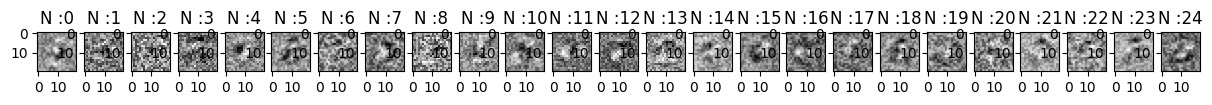

In [296]:
plt.figure(figsize=(15,8))
for i in range(theta1.shape[0]):
    a = theta1[i,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,theta1.shape[0],i+1)
    plt.title('N :'+ str(i))
    plt.imshow(a,cmap='gray')

# Optionnel 3 : Renforcement de l'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [300]:
#essayer de changer le nombre de couche et de neurones par couche
#essayer de changer le nombre d'itérations et les hyper parametre alpha et lambda

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 29Avril 2022 à 22h


In [ ]:
#BELAISSAOUI Mohamed ELmekki
#ABDELHADI Nabih Samy

# bonne chance